In [5065]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [5066]:
# loading the heart dataset to a pandas DataFrame
heart_dataset = pd.read_csv('/content/heart.csv')

In [5067]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5068]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5069]:
heart_dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5070]:
heart_dataset.head(6)

/usr/local/lib/python3.11/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


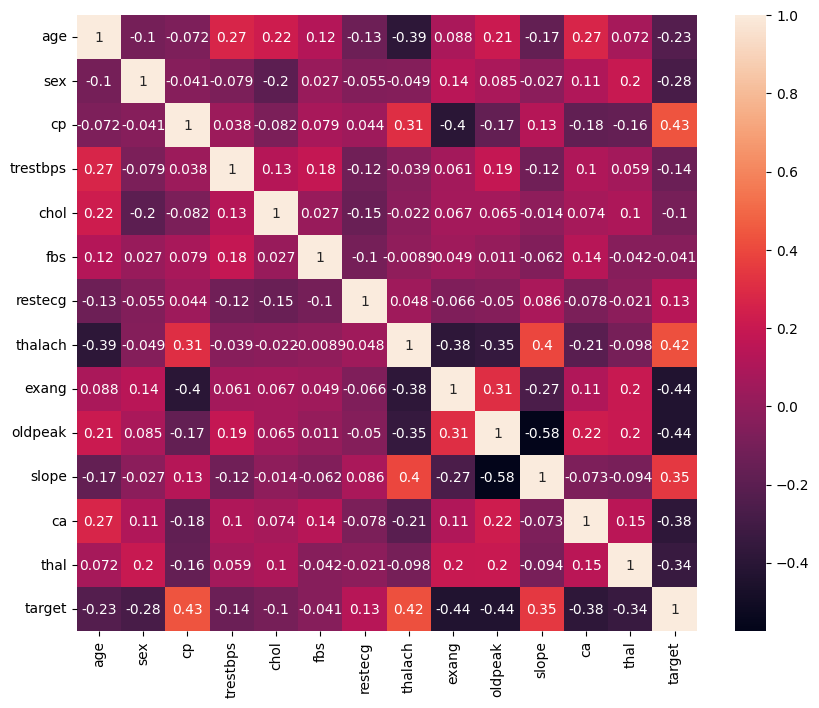

In [5071]:
plt.figure(figsize=(10,8))
sns.heatmap(data=heart_dataset.corr(),annot=True)
plt.show()

In [5072]:
heart_dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1020,True
1021,True
1022,True
1023,True


In [5073]:
heart_dataset.drop_duplicates(inplace=True)
heart_dataset.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
723,False
733,False
739,False
843,False


In [5074]:
heart_dataset.shape

(302, 14)

In [5075]:
X = heart_dataset.iloc[:,:-1]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2


In [5076]:
Y=heart_dataset["target"]
Y

,target
0,0
1,0
2,0
3,0
4,0
...,...
723,1
733,1
739,0
843,0


In [5077]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.267966,0.682656,-0.935208,-0.376556,-0.667728,-0.418446,0.901657,0.806035,-0.698344,-0.037124,0.979514,1.274980,1.119967
1,-0.157260,0.682656,-0.935208,0.478910,-0.841918,2.389793,-1.002541,0.237495,1.431958,1.773958,-2.271182,-0.714911,1.119967
2,1.724733,0.682656,-0.935208,0.764066,-1.403197,-0.418446,0.901657,-1.074521,1.431958,1.342748,-2.271182,-0.714911,1.119967
3,0.728383,0.682656,-0.935208,0.935159,-0.841918,-0.418446,0.901657,0.499898,-0.698344,-0.899544,0.979514,0.280034,1.119967
4,0.839089,-1.464866,-0.935208,0.364848,0.919336,2.389793,0.901657,-1.905464,-0.698344,0.739054,-0.645834,2.269926,-0.513994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.503322,-1.464866,1.005911,-0.661712,-0.687083,-0.418446,-1.002541,-1.511859,-0.698344,0.394086,-0.645834,-0.714911,-0.513994
298,-1.153610,-1.464866,1.005911,-1.346085,-2.041893,-0.418446,0.901657,1.112172,-0.698344,-0.382092,-0.645834,-0.714911,-0.513994
299,-0.267966,0.682656,-0.935208,-0.205463,0.164513,-0.418446,0.901657,0.499898,1.431958,-0.899544,0.979514,0.280034,1.119967
300,0.506972,0.682656,1.976470,1.619532,0.512893,-0.418446,-1.002541,-1.074521,-0.698344,-0.899544,0.979514,-0.714911,-0.513994


In [5078]:
Y=heart_dataset["target"]
Y

,target
0,0
1,0
2,0
3,0
4,0
...,...
723,1
733,1
739,0
843,0


In [5079]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.4,random_state=2)

In [5080]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
237,0.396267,0.682656,1.005911,-1.517178,-0.125804,-0.418446,-1.002541,0.193761,1.431958,-0.382092,-0.645834,-0.714911,1.119967
82,-1.042904,-1.464866,-0.935208,0.364848,-0.203222,-0.418446,-1.002541,0.106294,1.431958,-0.727060,-0.645834,-0.714911,-0.513994
232,0.506972,0.682656,1.976470,0.136724,-0.822564,-0.418446,0.901657,0.543632,-0.698344,-0.209608,0.979514,1.274980,-0.513994
135,-1.264315,0.682656,1.005911,-0.091401,1.325779,-0.418446,0.901657,0.543632,-0.698344,0.739054,0.979514,0.280034,-0.513994
269,0.396267,0.682656,0.035352,-0.376556,-0.512893,-0.418446,0.901657,-0.243577,-0.698344,-0.554576,-0.645834,3.264871,1.119967
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-1.153610,0.682656,0.035352,-0.661712,-0.512893,-0.418446,0.901657,0.893503,-0.698344,-0.899544,0.979514,-0.714911,-0.513994
22,0.949794,-1.464866,1.005911,0.193755,0.106449,-0.418446,-1.002541,0.980971,-0.698344,-0.899544,0.979514,-0.714911,-0.513994
72,-0.267966,0.682656,0.035352,0.136724,-0.880627,-0.418446,0.901657,0.368697,-0.698344,-0.209608,0.979514,0.280034,-0.513994
15,-0.378671,-1.464866,1.005911,0.478910,1.190298,-0.418446,-1.002541,-0.331045,-0.698344,0.394086,0.979514,0.280034,-0.513994


In [5081]:
Y_train

,target
368,1
95,1
358,0
168,1
521,1
...,...
85,1
23,1
78,1
16,1


In [5082]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [5083]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()



lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without heart disease', 'with heart disease']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
lr.score(X_train,Y_train)*100,lr.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[64 24]
 [ 9 85]]
Accuracy by confusion matrix: 0.8186813186813187


                       precision    recall  f1-score   support

without heart disease       0.88      0.73      0.80        88
   with heart disease       0.78      0.90      0.84        94

             accuracy                           0.82       182
            macro avg       0.83      0.82      0.82       182
         weighted avg       0.83      0.82      0.82       182

----------------------------------------------------------------------


(84.16666666666667, 81.86813186813187)

In [5084]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without heart disease', 'with heart disease']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
knn.score(X_train,Y_train)*100,knn.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[77 11]
 [30 64]]
Accuracy by confusion matrix: 0.7747252747252747


                       precision    recall  f1-score   support

without heart disease       0.72      0.88      0.79        88
   with heart disease       0.85      0.68      0.76        94

             accuracy                           0.77       182
            macro avg       0.79      0.78      0.77       182
         weighted avg       0.79      0.77      0.77       182

----------------------------------------------------------------------


(88.33333333333333, 77.47252747252747)

In [5085]:
score = []

# Will take some time
for i in range(1,15):

        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,Y_train)
        y_pred = knn.predict(X_test)

        score.append(accuracy_score(Y_test,y_pred))


In [5086]:
score

[0.7857142857142857,
 0.7747252747252747,
 0.8021978021978022,
 0.8131868131868132,
 0.8131868131868132,
 0.8186813186813187,
 0.8296703296703297,
 0.8351648351648352,
 0.8241758241758241,
 0.8186813186813187,
 0.8296703296703297,
 0.8296703296703297,
 0.8296703296703297,
 0.8461538461538461]

In [5087]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=7)
Knn.fit(X_train,Y_train)
Y_pred = Knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without heart disease', 'with heart disease']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
Knn.score(X_train,Y_train)*100,Knn.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[65 23]
 [ 8 86]]
Accuracy by confusion matrix: 0.8296703296703297


                       precision    recall  f1-score   support

without heart disease       0.89      0.74      0.81        88
   with heart disease       0.79      0.91      0.85        94

             accuracy                           0.83       182
            macro avg       0.84      0.83      0.83       182
         weighted avg       0.84      0.83      0.83       182

----------------------------------------------------------------------


(83.33333333333334, 82.96703296703298)

In [5088]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without heart disease', 'with heart disease']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
dt.score(X_train,Y_train)*100,dt.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[57 31]
 [25 69]]
Accuracy by confusion matrix: 0.6923076923076923


                       precision    recall  f1-score   support

without heart disease       0.70      0.65      0.67        88
   with heart disease       0.69      0.73      0.71        94

             accuracy                           0.69       182
            macro avg       0.69      0.69      0.69       182
         weighted avg       0.69      0.69      0.69       182

----------------------------------------------------------------------


(86.66666666666667, 69.23076923076923)

In [5089]:
mean_squared_error(Y_test,lr.predict(X_test)), mean_absolute_error(Y_test,lr.predict(X_test))

(0.1813186813186813, 0.1813186813186813)

In [5090]:
mean_squared_error(Y_test,Knn.predict(X_test)), mean_absolute_error(Y_test,Knn.predict(X_test))

(0.17032967032967034, 0.17032967032967034)

In [5091]:
mean_squared_error(Y_test,dt.predict(X_test)), mean_absolute_error(Y_test,dt.predict(X_test))

(0.3076923076923077, 0.3076923076923077)

In [5092]:
# 53	1	0	140	203	1	0	155	1	3.1	0	0	3
input_data = (53,1,0,140,203,1,0,155,1,3.1,0,0,3)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease ❤️')
else:
  print('The Person has Heart Disease 💔')

[0]
The Person does not have a Heart Disease ❤️


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
